A dataset of two variables, x and y, is provided here.
1. Perform a simple linear regression to find the m and b values that minimizes the
loss (sum of squares).

2. Calculate the correlation coefficient and statistical significance of this data (at 95% confidence). Is the correlation useful?
3. If I predict where x = 50, what is the 95% prediction interval for the predicted value of y?
4. Start your regression over and do a train/test split. Feel free to experiment with cross-validation and random-fold validation. Does the linear regression perform well and consistently on the testing data? Why or why not?

### 1. Perform a simple linear regression to find the m and b values that minimizes the loss (sum of squares).

Option 1 - Using QR decomposition to perform a linear regression

In [1]:
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# Import points
df = pd.read_csv('data/linear_normal.csv', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose() 

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# calculate coefficents for slope and intercept using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)

[1.75919315 4.69359655]


Option 2 - Using scikit-learn to do a simple linear regression

m = [1.75919315]
b = [4.69359655]


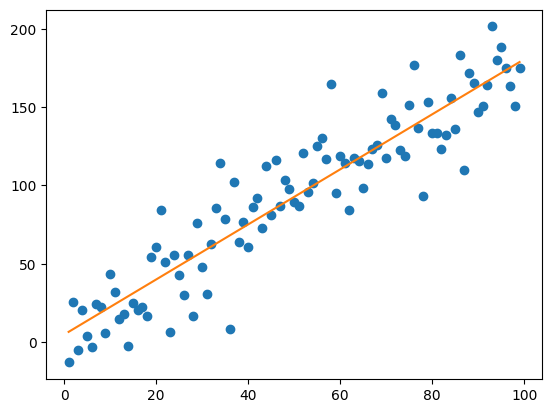

In [5]:
# Using scikit-learn to do a simple linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data points
df = pd.read_csv('data/linear_normal.csv', delimiter=',')

# Extract input variables(features) - all rows, all columns but the last
X = df.values[:, :-1]

# Extract output column (target variable) - all rows, last column
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# Display coefficients m and b (beta1, beta0)
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print(f'm = {m}')
print(f'b = {b}')

# Display visually
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

Option 3 - Performing stochastic gradient descent (SGD) for a linear regression

In [6]:
# Performing stochastic gradient descent for a linear regression
# trying to minimize the Mean Squared Error, not the Sum of Squared Errors (it is its average)

import pandas as pd
import numpy as np

# Input data
data = pd.read_csv('data/linear_normal.csv', header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
n = data.shape[0] # rows

# Building the model
m=0.0
b=0.0

sample_size = 1 # sample size - increase to perform mini-batch gradient descent
L = .0001 # The learning Rate
epochs = 1_000_000 # The number of iterations to perform gradient descent

# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False) 
    x_sample = X[idx]
    y_sample = Y[idx]
    
    # The current predicted value of Y
    Y_pred = m * x_sample + b
    
    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))
    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred) 
    
    m = m - L * D_m # Update m
    b = b - L * D_b # Update b
    
    # print progress
    if i % 10000 == 0: 
        print(f'Iteration {i}, m - {m}, b - {b}')
        print(f'idx {idx}, x_sample {x_sample}, y_sample {y_sample}')
        
print("y = {0}x + {1}".format(m, b))

Iteration 0, m - 2.020417679522779, b - 0.028456587035532097
idx [70], x_sample [71], y_sample [142.28293518]
Iteration 10000, m - 1.5758830619679125, b - 1.6798923566238955
idx [50], x_sample [51], y_sample [87.13801201]
Iteration 20000, m - 2.33294568416825, b - 2.95430592721925
idx [17], x_sample [18], y_sample [16.75744707]
Iteration 30000, m - 1.9706726781115707, b - 3.6603189322000165
idx [19], x_sample [20], y_sample [60.56415065]
Iteration 40000, m - 1.8042529983612963, b - 4.162395478955201
idx [97], x_sample [98], y_sample [150.894306]
Iteration 50000, m - 0.9872647363294063, b - 4.3560936443010645
idx [5], x_sample [6], y_sample [-3.53026008]
Iteration 60000, m - 1.6475164544540946, b - 4.692495395936128
idx [65], x_sample [66], y_sample [113.8506282]
Iteration 70000, m - 1.939335781661103, b - 4.755280057635375
idx [34], x_sample [35], y_sample [78.84012803]
Iteration 80000, m - 1.7178451722367996, b - 4.882810253873082
idx [50], x_sample [51], y_sample [87.13801201]
Iterat

Option 4 - Gradient Descent for Linear Regression - DOES NOT CONVERGE !
* gradients are VERY large, they are exploding, 
* the reason - data variance in y is pretty high and data is noisy, it requires scaling, or using smaller learning rate, or MSE instead of SSE as a loss function

In [74]:
# Performing gradient descent for a linear regression

import pandas as pd

# Import points from CSV
points = list(pd.read_csv("data/linear_normal.csv").itertuples())

# Building the model
m=0.0
b=00.0

# The learning Rate
L=.001

# The number of iterations
iterations = 100_000

# n = float(len(points)) # Number of elements in X

# Perform Gradient Descent
for i in range(iterations): 
    
    # slope with respect to m
    D_m = sum(2*p.x*((m*p.x+b)-p.y) for p in points)
    
    # slope with respect to b
    D_b = sum(2*((m*p.x+b)-p.y) for p in points)
    
    # Display what is going on with our variables
    print(f'Iteration {i}')
    print(f'm {m}, b {b}, D_m {D_m}, D_b {D_b}')
    # if i in (0, 1, 2, 3, 4, 5) or i % 10_000 == 0:
    #     print(f'Iteration {i}')
    #     print(f'm {m}, b {b}, D_m {D_m}, D_b {D_b}')

    # update m and b
    m -= L * D_m
    b -= L * D_b

print(f"y = {m}x + {b}")

Iteration 0
m 0.0, b 0.0, D_m -1201728.7461884313, D_b -18345.344282796254
Iteration 1
m 1201.7287461884314, b 18.345344282796255, D_m 788155157.784154, D_b 11882401.621150667
Iteration 2
m -786953.4290379656, b -11864.056276867872, D_m -516910972735.1193, D_b -7793206375.962962
Iteration 3
m 516124019.30608135, b 7781342.319686094, D_m 339015677565539.75, D_b 5111168478564.159
Iteration 4
m -338499553546.23364, b -5103387136.244473, D_m -2.223431803476621e+17, D_b -3352156050779036.5
Iteration 5
m 222004680794115.9, b 3347052663642.792, D_m 1.4582360969886476e+20, D_b 2.19850905628913e+18
Iteration 6
m -1.4560160501807066e+17, b -2195162003625487.2, D_m -9.563830611920288e+22, D_b -1.4418905317556172e+21
Iteration 7
m 9.54927045141848e+19, b 1.4396953697519918e+18, D_m 6.272431203862572e+25, D_b 9.45662834373641e+23
Iteration 8
m -6.2628819334111536e+22, b -9.44223139003889e+20, D_m -4.113769346578718e+28, D_b -6.20212267589227e+26
Iteration 9
m 4.1075064646453065e+25, b 6.19268044450

Sub Option 4 for GD – Unscaled Data, SSE Loss, Very Small Learning Rate
* not bad, close to global minimum of SSE with learning rate 1e-6
* learning rate of 1e-7 is too slow to converge with 100k iterations, producing inaccurate line

In [75]:
import pandas as pd

# Load data
url = "data/linear_normal.csv"
points = list(pd.read_csv(url).itertuples())

# Initialize
m, b = 0.0, 0.0
L = 1e-6  # Very small learning rate to prevent overflow
iterations = 100_000

for i in range(iterations):
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)
    m -= L * D_m
    b -= L * D_b
    if i % 10_000 == 0:
        print(f"[{i:6}] m = {m:.4f}, b = {b:.4f}")

print(f"\nSub Option 4 Final: y = {m:.4f}x + {b:.4f}")

[     0] m = 1.2017, b = 0.0183
[ 10000] m = 1.8024, b = 1.8279
[ 20000] m = 1.7857, b = 2.9335
[ 30000] m = 1.7755, b = 3.6125
[ 40000] m = 1.7692, b = 4.0296
[ 50000] m = 1.7653, b = 4.2858
[ 60000] m = 1.7630, b = 4.4431
[ 70000] m = 1.7615, b = 4.5398
[ 80000] m = 1.7606, b = 4.5991
[ 90000] m = 1.7601, b = 4.6356

Sub Option 4 Final: y = 1.7597x + 4.6579


Sub Option 2 – Unscaled Data, MSE Loss (gradients divided by n)

In [82]:
import pandas as pd

url = "data/linear_normal.csv"
points = list(pd.read_csv(url).itertuples())
n = len(points)

m, b = 0.0, 0.0
L = 1e-4  # Slightly larger than Option 1 since MSE gradients are smaller
iterations = 100_000

for i in range(iterations):
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points) / n
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points) / n
    m -= L * D_m
    b -= L * D_b
    if i % 10_000 == 0:
        print(f"[{i:6}] m = {m:.4f}, b = {b:.4f}")

print(f"\nSub Option 2 Final: y = {m:.4f}x + {b:.4f}")


[     0] m = 1.2139, b = 0.0185
[ 10000] m = 1.8022, b = 1.8420
[ 20000] m = 1.7855, b = 2.9507
[ 30000] m = 1.7753, b = 3.6284
[ 40000] m = 1.7690, b = 4.0426
[ 50000] m = 1.7652, b = 4.2957
[ 60000] m = 1.7629, b = 4.4504
[ 70000] m = 1.7614, b = 4.5450
[ 80000] m = 1.7606, b = 4.6028
[ 90000] m = 1.7600, b = 4.6381

Sub Option 2 Final: y = 1.7597x + 4.6597


Sub Option 3 – Scaled Data (StandardScaler), SSE Loss

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and scale
df = pd.read_csv("data/linear_normal.csv")
scaler_x = StandardScaler()
scaler_y = StandardScaler()
df['x_scaled'] = scaler_x.fit_transform(df[['x']])
df['y_scaled'] = scaler_y.fit_transform(df[['y']])
points = list(df.itertuples())

m, b = 0.0, 0.0
L = 0.01  # Faster since scaled
iterations = 10_000

for i in range(iterations):
    D_m = sum(2 * p.x_scaled * ((m * p.x_scaled + b) - p.y_scaled) for p in points)
    D_b = sum(2 * ((m * p.x_scaled + b) - p.y_scaled) for p in points)
    m -= L * D_m
    b -= L * D_b
    if i % 1000 == 0:
        print(f"[{i:5}] m = {m:.4f}, b = {b:.4f}")

# Convert back to original scale
m_orig = (scaler_y.scale_[0] / scaler_x.scale_[0]) * m
b_orig = scaler_y.inverse_transform([[b]])[0][0] - m_orig * scaler_x.mean_[0]
print(f"\nSub Option 3 Final: y = {m_orig:.4f}x + {b_orig:.4f}")


[    0] m = 1.8299, b = -0.0000
[ 1000] m = 0.9242, b = -0.0000
[ 2000] m = 0.9242, b = -0.0000
[ 3000] m = 0.9242, b = -0.0000
[ 4000] m = 0.9242, b = -0.0000
[ 5000] m = 0.9242, b = -0.0000
[ 6000] m = 0.9242, b = -0.0000
[ 7000] m = 0.9242, b = -0.0000
[ 8000] m = 0.9242, b = -0.0000
[ 9000] m = 0.9242, b = -0.0000

Sub Option 3 Final: y = 1.7592x + 4.6936


Sub Option 4 – Scaled Data (StandardScaler), MSE Loss - THE BEST OPTION

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/linear_normal.csv")
scaler_x = StandardScaler()
scaler_y = StandardScaler()
df['x_scaled'] = scaler_x.fit_transform(df[['x']])
df['y_scaled'] = scaler_y.fit_transform(df[['y']])
points = list(df.itertuples())
n = len(points)

m, b = 0.0, 0.0
L = 0.01
iterations = 10_000

for i in range(iterations):
    D_m = sum(2 * p.x_scaled * ((m * p.x_scaled + b) - p.y_scaled) for p in points) / n
    D_b = sum(2 * ((m * p.x_scaled + b) - p.y_scaled) for p in points) / n
    m -= L * D_m
    b -= L * D_b
    if i % 1000 == 0:
        print(f"[{i:5}] m = {m:.4f}, b = {b:.4f}")

m_orig = (scaler_y.scale_[0] / scaler_x.scale_[0]) * m
b_orig = scaler_y.inverse_transform([[b]])[0][0] - m_orig * scaler_x.mean_[0]
print(f"\nSub Option 4 Final: y = {m_orig:.4f}x + {b_orig:.4f}")


[    0] m = 0.0185, b = -0.0000
[ 1000] m = 0.9242, b = -0.0000
[ 2000] m = 0.9242, b = -0.0000
[ 3000] m = 0.9242, b = -0.0000
[ 4000] m = 0.9242, b = -0.0000
[ 5000] m = 0.9242, b = -0.0000
[ 6000] m = 0.9242, b = -0.0000
[ 7000] m = 0.9242, b = -0.0000
[ 8000] m = 0.9242, b = -0.0000
[ 9000] m = 0.9242, b = -0.0000

Sub Option 4 Final: y = 1.7592x + 4.6936


This is the most optimal option, because Scaled Data + MSE Loss provides:

✅ Numerical stability: Standardization prevents exploding gradients.

✅ Efficient convergence: You can use a larger learning rate (e.g. 0.01) and converge quickly.

✅ Widely used in ML practice: Most ML frameworks (e.g. TensorFlow, PyTorch) normalize inputs and use MSE as a default loss.

✅ Interpretability is preserved: You can always transform the learned parameters back to the original scale.

Scaled data + SSE, the previous option, works pretty well too, though it is not so fast.

### 2. Calculate the correlation coefficient and statistical significance of this data (at 95% confidence). Is the correlation useful?

In [98]:
# Using Pandas to see the correlation coefficient between every pair of variables

import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('data/linear_normal.csv', delimiter=",")

# Print correlations between variables
correlations = df.corr(method='pearson') 
print(correlations)

         x        y
x  1.00000  0.92421
y  0.92421  1.00000


In [108]:
correlations.loc['y', 'x']

np.float64(0.9242100628677162)

Our correlation is pretty strong.

A fundamental question now : is it possible I see a linear relationship in my data due to random chance? How can we be 95% sure the correlation between these two variables is significant and not coincidental?

We'll use hypothesis testing to answer it. We use a T-distribution rather than a normal distribution to do hypothesis testing with linear regression. degrees of freedom = (n – 1)

H0:ρ = 0 (implies no relationship)\\ 
H1:ρ ≠ 0 (relationship is present)

In [99]:
# Calculating the critical value from a T-distribution

from scipy.stats import t

n = len(df['x'])

lower_cv = t(n-1).ppf(.025) 
upper_cv = t(n-1).ppf(.975)
print(lower_cv, upper_cv)

-1.9844674544266925 1.984467454426692


In [110]:
# Testing significance for linear-looking data

from scipy.stats import t 
from math import sqrt

# sample size
n = len(df['x'])
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient derived from our data 
r = correlations.loc['y', 'x']

# Perform the test
test_value = r / sqrt((1-r**2) / (n-2)) 

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv: 
   print("CORRELATION PROVEN, REJECT H0")
else:
   print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
   p_value = 1.0 - t(n-1).cdf(test_value)
else:
   p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2 
print("P-VALUE: {}".format(p_value))

TEST VALUE: 23.835515323677363
CRITICAL RANGE: -1.9844674544266925, 1.984467454426692
CORRELATION PROVEN, REJECT H0
P-VALUE: 0.0


* The test value here is approximately 23.8355, which is definitely outside the range of (-1.98, 1.98) so we can reject the null hypothesis and say our correlation is real. 
* That’s because the p-value is remarkably significant: 0.0. This is well below our .05 threshold, so this is virtually not coincidence: there is a correlation. It is highly unlikely these points randomly arranged themselves near a line this closely by chance.

### 3. If I predict where x = 50, what is the 95% prediction interval for the predicted value of y?


In [111]:
# Calculating a prediction interval of x = 50

import pandas as pd
from scipy.stats import t 
from math import sqrt

# Load the data
points = list(pd.read_csv('data/linear_normal.csv', delimiter=",").itertuples())
n = len(points)

# Linear Regression Line
m = 1.75919315
b = 4.69359655

# Calculate Prediction Interval for x = 50
x_0 = 50
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))

margin_of_error = t_value * standard_error * \
                    sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                        (n * sum(p.x**2 for p in points) - \
                            sum(p.x for p in points) ** 2))

predicted_y = m * x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

50.7920864989629 134.5144216010371


There’s a 95% probability that at the point x = 50 we will have values of y between 50.79 and 134.51.

### 4. Start your regression over and do a train/test split. Feel free to experiment with cross-validation and random-fold validation. Does the linear regression perform well and consistently on the testing data? Why or why not?

y = [1.72726809]x + [7.09370456]
r^2: 0.846


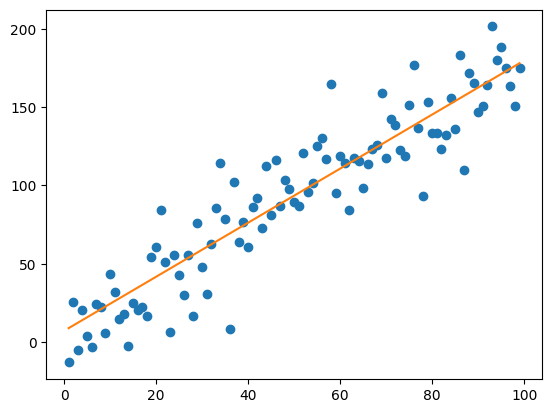

In [166]:
# Doing a train/test split on linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/linear_normal.csv', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
# This leaves a third of the data out for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression() 
model.fit(X_train, Y_train)

m = model.coef_.flatten()
b = model.intercept_.flatten()
print(f"y = {m}x + {b}")

result = model.score(X_test, Y_test) 
print("r^2: %.3f" % result)

# Display visually
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

Model behaviour is unstable, compared to regular LinearRegression trained on the whole dataset.
We get a different line each time.
It is probably related to high variance and noisy input data we have, and to a limited dataset size.

In [168]:
# Using three-fold cross-validation for a linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('data/linear_normal.csv', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True) 
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold) 

# m = model.coef_.flatten()
# b = model.intercept_.flatten()
# print(f"y = {m}x + {b}")

print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.86119665 0.78237719 0.85733887]
MSE: mean=0.834 (stdev-0.036)


In [174]:
# three-fold cross-validation with trained model instances
# manually training the model within the cross-validation loop to get slope and intercept for each fold

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load data
df = pd.read_csv('data/linear_normal.csv', delimiter=",")

# Extract input and output
X = df.values[:, :-1]
Y = df.values[:, -1]

# Prepare K-Fold CV
kfold = KFold(n_splits=3, random_state=7, shuffle=True)

fold = 1
mse_list = []
r2_list = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = LinearRegression()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    m = model.coef_[0]
    b = model.intercept_

    print(f"Fold {fold}: y = {m:.3f}x + {b:.3f} | MSE = {mse:.4f} | R² = {r2:.4f}")
    fold += 1

# Summary
print("\nMSE: mean = %.4f (stdev = %.4f)" % (np.mean(mse_list), np.std(mse_list)))
print("R²:  mean = %.4f (stdev = %.4f)" % (np.mean(r2_list), np.std(r2_list)))


Fold 1: y = 1.689x + 10.350 | MSE = 494.9465 | R² = 0.8612
Fold 2: y = 1.876x + -2.197 | MSE = 504.6246 | R² = 0.7824
Fold 3: y = 1.709x + 5.987 | MSE = 415.9752 | R² = 0.8573

MSE: mean = 471.8488 (stdev = 39.7057)
R²:  mean = 0.8336 (stdev = 0.0363)


* R² (coefficient of determination) indicates that on fold 1 the model explains ~86% of the variance.
* Fold 3 has the lowest MSE of 415.98, indicating the model performed best on that subset.
* MSE has the same unit as the squared output variable (e.g., if Y is in dollars, MSE is in dollars²)
* ** How well the model fits the data (R²)
* ** How far off its predictions are (MSE)

In [175]:
# Using a random-fold validation for a linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv('data/linear_normal.csv', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.86119665 0.83209669 0.83907408 0.85186895 0.84767816 0.89153761
 0.8142463  0.82928966 0.81397504 0.83107953]
mean=0.841 (stdev-0.022)


In [177]:
# an updated version with both R² and MSE for each random split

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load data
df = pd.read_csv('data/linear_normal.csv', delimiter=",")

# Extract input and output
X = df.values[:, :-1]
Y = df.values[:, -1]

# ShuffleSplit cross-validation
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=7)

mse_list = []
r2_list = []
models_info = []

best_split_idx = -1
best_r2 = -np.inf

for i, (train_index, test_index) in enumerate(cv.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = LinearRegression()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    m = model.coef_[0]
    b = model.intercept_

    mse_list.append(mse)
    r2_list.append(r2)
    models_info.append({'split': i, 'm': m, 'b': b, 'mse': mse, 'r2': r2})

    print(f"Split {i}: y = {m:.3f}x + {b:.3f} | MSE = {mse:.4f} | R² = {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_split_idx = i

# Summary
print("\nSummary:")
print("MSE: mean = %.4f (stdev = %.4f)" % (np.mean(mse_list), np.std(mse_list)))
print("R²:  mean = %.4f (stdev = %.4f)" % (np.mean(r2_list), np.std(r2_list)))

# Show best model info
best_model = models_info[best_split_idx - 1]
print(f"\n✅ Best Model: Split {best_model['split']}")
print(f"   y = {best_model['m']:.3f}x + {best_model['b']:.3f}")
print(f"   MSE = {best_model['mse']:.4f} | R² = {best_model['r2']:.4f}")


Split 1: y = 1.689x + 10.350 | MSE = 494.9465 | R² = 0.8612
Split 2: y = 1.731x + 5.949 | MSE = 568.7035 | R² = 0.8321
Split 3: y = 1.706x + 6.783 | MSE = 590.8875 | R² = 0.8391
Split 4: y = 1.724x + 5.301 | MSE = 431.0342 | R² = 0.8519
Split 5: y = 1.823x + 1.420 | MSE = 442.3293 | R² = 0.8477
Split 6: y = 1.720x + 6.158 | MSE = 407.0594 | R² = 0.8915
Split 7: y = 1.758x + 3.108 | MSE = 575.6820 | R² = 0.8142
Split 8: y = 1.724x + 3.072 | MSE = 548.6953 | R² = 0.8293
Split 9: y = 1.856x + -1.246 | MSE = 500.5941 | R² = 0.8140
Split 10: y = 1.770x + 6.429 | MSE = 486.7645 | R² = 0.8311

Summary:
MSE: mean = 504.6696 (stdev = 61.4678)
R²:  mean = 0.8412 (stdev = 0.0221)

✅ Best Model: Split 6
   y = 1.720x + 6.158
   MSE = 407.0594 | R² = 0.8915


Considering the two criteria:

* Lowest MSE = best prediction accuracy

* Highest R² = best explained variance

Split 6 is the best overall, as it gives:

* The lowest error (MSE) - 407.0594

* The highest predictive power (R²) - 0.8915